<a href="https://colab.research.google.com/github/Xavier9Neo/Praktikum_KB/blob/main/2209106093_TheaPriscillaEsikeltaTarigan_POSTTEST5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## POSTTEST 5

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from prettytable import PrettyTable
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

membaca dataset

In [14]:
stroke= pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [15]:
stroke_clean = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

Mengulang menghapus id
tambahan menghapus residence type

In [16]:
stroke_clean = stroke_clean.drop(columns = ["Residence_type", "id"])

menghapus missing value

In [17]:
stroke_clean = stroke_clean.dropna(subset=['bmi'])

mengubah data yang masih string jadi numerik

In [18]:
# Inisiasi
le = LabelEncoder()

# encoding pada kolom kategorikal
stroke_clean['gender'] = le.fit_transform(stroke_clean['gender'])
stroke_clean['ever_married'] = le.fit_transform(stroke_clean['ever_married'])
stroke_clean['work_type'] = le.fit_transform(stroke_clean['work_type'])
stroke_clean['smoking_status'] = le.fit_transform(stroke_clean['smoking_status'])

# Mengisi nilai NaN untuk kolom numerik dengan nilai rata-rata dan kolom kategorikal dengan modus
stroke_clean.fillna(stroke_clean.mean(), inplace=True)

# Mengisi nilai NaN pada kolom kategorikal dengan modus
stroke_clean.fillna(stroke_clean.mean(), inplace=True)
stroke_clean['gender'].fillna(stroke_clean['gender'].mode()[0], inplace=True)
stroke_clean['smoking_status'].fillna(stroke_clean['smoking_status'].mode()[0], inplace=True)

<ipython-input-18-7083b2d8761c>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_clean['gender'].fillna(stroke_clean['gender'].mode()[0], inplace=True)
<ipython-input-18-7083b2d8761c>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

data yang sudah jadi

In [19]:
stroke_clean

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,228.69,36.6,1,1
2,1,80.0,0,1,1,2,105.92,32.5,2,1
3,0,49.0,0,0,1,2,171.23,34.4,3,1
4,0,79.0,1,0,1,3,174.12,24.0,2,1
5,1,81.0,0,0,1,2,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,166.29,25.6,1,0


In [20]:
from sklearn.impute import SimpleImputer

In [21]:
float_imputer = SimpleImputer(missing_values=pd.NA, strategy='mean')
text_imputer = SimpleImputer(missing_values=pd.NA, strategy='most_frequent')

In [22]:
stroke_clean[['gender', 'work_type']] = float_imputer.fit_transform(stroke_clean[['gender', 'work_type']])

In [23]:
stroke_clean[['ever_married', 'hypertension', 'heart_disease', 'smoking_status']] = text_imputer.fit_transform(stroke_clean[['ever_married', 'hypertension', 'heart_disease', 'smoking_status']])

In [24]:
stroke_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1,2.0,228.69,36.6,1,1
2,1.0,80.0,0,1,1,2.0,105.92,32.5,2,1
3,0.0,49.0,0,0,1,2.0,171.23,34.4,3,1
4,0.0,79.0,1,0,1,3.0,174.12,24.0,2,1
5,1.0,81.0,0,0,1,2.0,186.21,29.0,1,1


In [25]:
stroke_clean.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.030738,0.021578,0.082712,-0.037237,0.058560,0.053664,-0.026678,-0.060004,0.006757
age,-0.030738,1.000000,0.274425,0.257123,0.680782,-0.366987,0.235838,0.333398,0.275515,0.232331
hypertension,0.021578,0.274425,1.000000,0.115991,0.162406,-0.052750,0.180543,0.167811,0.110808,0.142515
heart_disease,0.082712,0.257123,0.115991,1.000000,0.111245,-0.030373,0.154525,0.041357,0.055236,0.137938
ever_married,-0.037237,0.680782,0.162406,0.111245,1.000000,-0.357946,0.151377,0.341695,0.264642,0.105089
work_type,0.058560,-0.366987,-0.052750,-0.030373,-0.357946,1.000000,-0.050581,-0.304876,-0.310911,-0.033756
avg_glucose_level,0.053664,0.235838,0.180543,0.154525,0.151377,-0.050581,1.000000,0.175502,0.066335,0.138936
bmi,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,0.175502,1.000000,0.224473,0.042374
smoking_status,-0.060004,0.275515,0.110808,0.055236,0.264642,-0.310911,0.066335,0.224473,1.000000,0.051558
stroke,0.006757,0.232331,0.142515,0.137938,0.105089,-0.033756,0.138936,0.042374,0.051558,1.000000


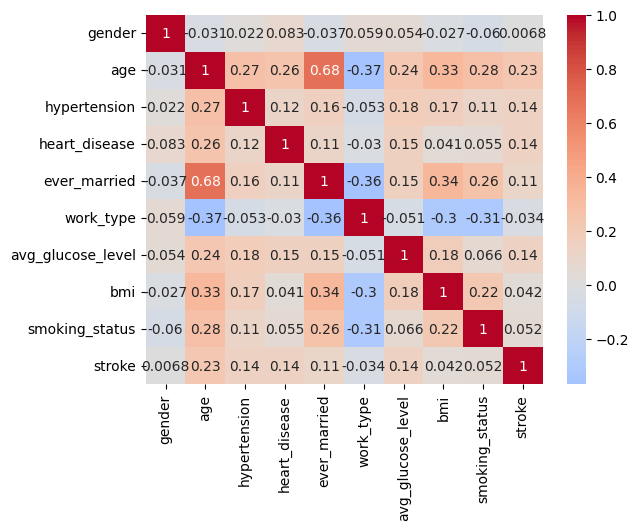

In [26]:
korelasi = stroke_clean.corr()
sns.heatmap(korelasi, cmap='coolwarm', annot=True, center=0)
plt.show()

age, ever_married, bmi, smoking_status

In [27]:
new_stroke = stroke_clean[['age', 'ever_married', 'bmi', 'smoking_status']]

In [28]:
new_stroke.head()

,age,ever_married,bmi,smoking_status
0,67.0,1,36.6,1
2,80.0,1,32.5,2
3,49.0,1,34.4,3
4,79.0,1,24.0,2
5,81.0,1,29.0,1


In [29]:
x = new_stroke
y = stroke_clean['stroke']

In [30]:
x.head()

,age,ever_married,bmi,smoking_status
0,67.0,1,36.6,1
2,80.0,1,32.5,2
3,49.0,1,34.4,3
4,79.0,1,24.0,2
5,81.0,1,29.0,1


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
import tensorflow as tf
from keras import Sequential, layers

In [45]:
model = Sequential([
    layers.Dense(4, activation='relu', input_shape=[4]),
    layers.Dense(10, activation='relu'),
    layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              44 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114 (456.00 B)

 Trainable params: 114 (456.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
y.shape

(4909,)

In [49]:
x.shape

(4909, 9)

In [50]:
n = stroke_clean.iloc[:, -1]
n.shape

(4909,)

In [51]:
stroke_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1,2.0,228.69,36.6,1,1
2,1.0,80.0,0,1,1,2.0,105.92,32.5,2,1
3,0.0,49.0,0,0,1,2.0,171.23,34.4,3,1
4,0.0,79.0,1,0,1,3.0,174.12,24.0,2,1
5,1.0,81.0,0,0,1,2.0,186.21,29.0,1,1


In [52]:
x = stroke_clean.iloc[:, :-1]
y = stroke_clean.iloc[:, -1]

In [53]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0531 - loss: 5.8957 - val_accuracy: 0.9460 - val_loss: 0.4459
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9637 - loss: 0.2832 - val_accuracy: 0.9460 - val_loss: 0.2360
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9567 - loss: 0.1950 - val_accuracy: 0.9460 - val_loss: 0.2177
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9563 - loss: 0.1804 - val_accuracy: 0.9460 - val_loss: 0.2093
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9601 - loss: 0.1658 - val_accuracy: 0.9460 - val_loss: 0.2062
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9585 - loss: 0.1650 - val_accuracy: 0.9460 - val_loss: 0.2047
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9635 - loss: 0.1481 - val_accuracy: 0.9460 - val_loss: 0.2021
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9655 - loss: 0.1492 - val_accuracy: 0.9460 - val_loss:

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)